In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
EPOCHS=10
OPTIMIZER=tf.keras.optimizers.legacy.Adam(learning_rate=1e-6)
LOSS=tf.keras.losses.SparseCategoricalCrossentropy()
BATCH=128

In [4]:
dataset_path = '/kaggle/input/dogs-vs-cats/train'

# Specify the batch size and image size
batch_size = 32
image_size = (128,128)

# Create an ImageDataGenerator for data augmentation and preprocessing

# Create the training dataset
train_data,val_data=tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=BATCH,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 20000 files belonging to 2 classes.
Using 18000 files for training.
Using 2000 files for validation.


In [5]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [6]:
len(train_data)*256

36096

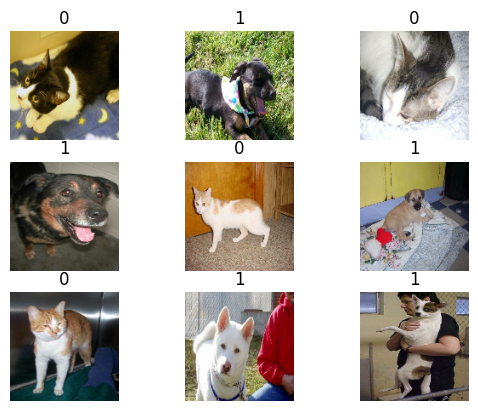

In [7]:
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy()/255.0)
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

In [8]:
train_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten,Dense
model = tf.keras.Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(128,128,3)))
model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(128,128,3)))
model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))


model.add(Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [10]:
model.compile(optimizer=OPTIMIZER, loss=LOSS,metrics=['acc'])

In [ ]:
hist=model.fit(train_data,epochs=EPOCHS,batch_size=BATCH,validation_data=val_data)

Epoch 1/10
  7/141 [>.............................] - ETA: 39:07 - loss: 1.1826 - acc: 0.4989

In [ ]:
model.evaluate(val_data)

In [ ]:
import matplotlib.pyplot as plt

# assuming history is your tensorflow history object
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Train and Validation Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
